# Method validation

This notebook contains some charts to validate our solid media growth assays
and to compare the two machines (Tecan and SpectraMax) we used.

### To Do

* Compare final time point from space and ground plates measured with the Tecan to the SpectraMax
* Fix ledgend annotation as requested by reviewers

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.DataFrame.from_csv('OD600_tecan.csv')

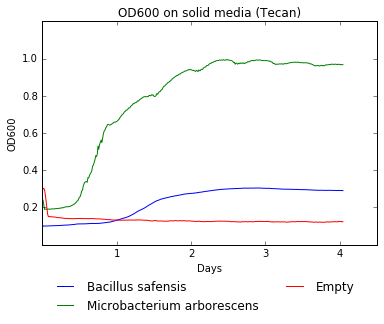

In [51]:
plot( df.index/24, df['Bacillus safensis'], label='Bacillus safensis' )
plot( df.index/24, df['Microbacterium arborescens'], label='Microbacterium arborescens' )
plot( df.index/24, df['Empty'], label='Empty' )
lgd = legend(bbox_to_anchor=(0, -0.35), loc=3, ncol=2, frameon=False )
xticks( [1,2,3,4] )
xlabel('Days')

yticks( [0.2, 0.4, 0.6, 0.8, 1.0] )
ylim(0,1.2)
ylabel('OD600')

title('OD600 on solid media (Tecan)')

savefig('OD600_tecan.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
savefig('OD600_tecan.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [87]:
df_tecan = pd.read_csv( 'tecan_final_OD600.csv', index_col=False ).set_index('Sample')
df_sptmx = pd.read_csv( 'Space_vs_Ground.tsv', sep='\t', index_col=False ).set_index('n')
teams = pd.read_csv( 'spacebugs.tsv', sep='\t', names=['n','source','species','short name'] )

In [89]:
df_sptmx.head()

,short name,long name,space 96h OD,space 96h OD std,ground 96h OD,ground 96h OD std,alive
n,,,,,,,
1,RAID3B,Oakland Raiders,1.445826,0.190053,1.445826,0.444495,True
2,Chit1C,Pop Warner Chittenango,0.985909,0.474196,0.985909,0.245507,True
3,MER 157,Mars Exploration Rover (JPL),0.960022,0.220612,0.960022,0.434333,True
4,SMI9,Smithsonian A&S Museum,1.246443,0.127038,1.246443,0.235467,True
5,DIS2A,Discover Magazine,1.221748,0.389365,1.221748,0.300231,True


In [52]:
df_tecan.head()

,Space,STDEVspace,Ground,STDEVground
Sample,,,,
1,1.786500,0.261703,1.576400,0.472096
2,1.231000,0.092113,0.799600,0.066749
3,0.847267,0.249040,0.998200,0.250245
4,1.411233,0.144923,1.292133,0.164600
5,1.378683,0.045681,1.182633,0.138315


In [70]:
teams.head()

,n,source,species,short name
0,1,JPL,Microbacteria arborescens,OB179
1,2,JPL,Bacillus safensis,MER TA 8-2
2,3,JPL,Bacillus pumilus,MER TA 21
3,4,JPL,Bacillus megaterium PPB5,273.1.3
4,5,JPL,Bacillus atrophaeus,MER TA 108


In [90]:
df_sptmx = df_sptmx.merge( teams ).set_index('n').sort_index()
df_sptmx.head()

,short name,long name,space 96h OD,space 96h OD std,ground 96h OD,ground 96h OD std,alive,source,species
n,,,,,,,,,
1,OB179,1975 Viking Mars Orbiter,1.381485,0.097210,1.381485,0.417282,True,JPL,Microbacteria arborescens
2,MER TA 8-2,Mars Exploration Rover (JPL),1.463374,0.138228,1.463374,0.409781,True,JPL,Bacillus safensis
3,MER TA 21,Mars Exploration Rover (JPL),1.491609,0.314732,1.491609,0.234723,True,JPL,Bacillus pumilus
4,273.1.3,Mars Exploration Rover (JPL),1.848448,0.094799,1.848448,0.205193,True,JPL,Bacillus megaterium PPB5
5,MER TA 108,Mars Exploration Rover (JPL),1.232715,0.076658,1.232715,0.280418,True,JPL,Bacillus atrophaeus


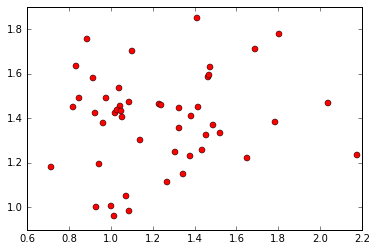

In [94]:
plot( df_tecan['Space'], df_sptmx['space 96h OD'], 'ro' )

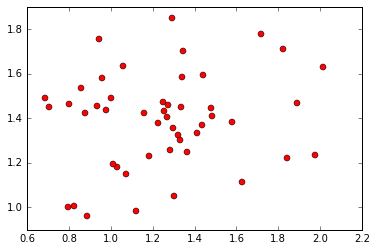

In [95]:
plot( df_tecan['Ground'], df_sptmx['ground 96h OD'], 'ro' )

In [4]:
ground1 = pd.read_csv( 'Tecan_final_ground1.csv' )
ground2 = pd.read_csv( 'Tecan_final_ground2.csv' )
ground3 = pd.read_csv( 'Tecan_final_ground3.csv' )

space1 = pd.read_csv( 'Tecan_final_space1.csv' )
space2 = pd.read_csv( 'Tecan_final_space2.csv' )
space3 = pd.read_csv( 'Tecan_final_space3.csv' )